> __Content modified under Creative Commons Attribution license CC-BY
> 4.0, code under BSD 3-Clause License © 2020 R.C. Cooper, L.A. Barba, N.C. Clementi__

# 02 - Seeing stats in a new light

Welcome to the second lesson in "Analyze Data," Module 2 of your series
in _Computational Mechanics_. In the previous lesson, [Cheers! Stats
with Beers](./01_Cheers_Stats_Beers), You did some exploratory
data analysis with a data set of canned craft beers in the US [1]. We'll
continue using that same data set here, but with a new focus on
_visualizing statistics_.

In her lecture ["Looking at Data"](https://youtu.be/QYDuAo9r1xE), Prof. Kristin Sainani says that you should always plot your data. Immediately, several things can come to light: are there outliers in your data? (Outliers are data points that look abnormally far from other values in the sample.) Are there data points that don't make sense? (Errors in data entry can be spotted this way.) And especially, you want to get a _visual_ representation of how data are distributed in your sample.

In this lesson, you'll play around with different ways of visualizing
data. You have so many ways to play! Have a look at the gallery of [The
Data Viz Project](http://datavizproject.com) by _ferdio_ (a data viz
agency in Copenhagen). Aren't those gorgeous? Wouldn't you like to be
able to make some pretty pics like that? Python can help!

Let's begin. You'll import your favorite Python libraries, and set some
font parameters for your plots to look nicer. Then you'll load our data
set for craft beers and begin!

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

## Read the data

Like in the previous lesson, you will load the data from a `.csv` file. You may have the file in your working directory if you downloaded it when working through the previous lesson. In that case, you could load it like this:

```Python
beers = pd.read_csv("beers.csv")
```

If you downloaded the full set of lesson files from your public repository, you can find the file in the `/data` folder, and you can load it with the full path:

In [2]:
# Load the beers data set using pandas, and assign it to a dataframe
beers = pd.read_csv("../data/beers.csv")

##### Note:

If you don't have the data file locally, download it by adding a code cell, and executing the following code in it:

```Python
from urllib.request import urlretrieve
URL = 'http://go.gwu.edu/engcomp2data1?accessType=DOWNLOAD'
urlretrieve(URL, 'beers.csv')
```
The data file will be downloaded to your working directory, and you will load it like described above.

OK. Let's have a look at the first few rows of the `pandas` dataframe
you just created from the file, and confirm that it's a dataframe using
the `type()` function. You only display the first 10 rows to save some
space.

In [3]:
type(beers)

pandas.core.frame.DataFrame

In [4]:
beers[beers['style']=='American IPA']

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0
28,28,0.070,70.0,799,21st Amendment IPA (2006),American IPA,368,12.0
29,29,0.070,70.0,797,Brew Free! or Die IPA (2008),American IPA,368,12.0
30,30,0.070,70.0,796,Brew Free! or Die IPA (2009),American IPA,368,12.0
...,...,...,...,...,...,...,...,...
2387,2390,0.059,135.0,1676,Troopers Alley IPA,American IPA,344,12.0
2390,2393,0.065,82.0,2417,4000 Footer IPA,American IPA,109,12.0
2392,2395,0.065,69.0,1697,Be Hoppy IPA,American IPA,339,16.0
2393,2396,0.069,69.0,2194,Worthy IPA,American IPA,199,12.0


In [5]:
beers.columns

Index(['Unnamed: 0', 'abv', 'ibu', 'id', 'name', 'style', 'brewery_id',
       'ounces'],
      dtype='object')

## Quantitative vs. categorical data

As you can see in the nice table that `pandas` printed for the
dataframe, you have several features for each beer: the label `abv`
corresponds to the acohol-by-volume fraction, label `ibu` refers to the
international bitterness unit (IBU), then you have the `name` of the beer
and the `style`, the brewery ID number, and the liquid volume of the
beer can, in ounces.

Alcohol-by-volume is a numeric feature: a volume fraction, with possible
values from 0 to 1 (sometimes also given as a percentage). In the first
10 rows of your dataframe, the `ibu` value is missing (all those `NaN`s),
but you saw in the previous lesson that `ibu` is also a numeric feature,
with values that go from a minimum of 4 to a maximum of 138 (in your data
set). IBU is pretty mysterious: how do you measure the bitterness of
beer? It turns out that bitterness is measured as parts per million of
_isohumulone_, the acid found in hops [2]. 

For these numeric features, you learned that you can get an idea of the
_central tendency_ in the data using the **mean value**, and you get
ideas of _spread_ of the data with the **standard deviation** (and also
with the range, but standard deviation is the most common).

Notice that the beer data also has a feature named `style`: it can be
"American IPA" or "American Porter" or a bunch of other styles of beer.
If you want to study the beers according to style, you'll have to come up
with some new ideas, because you can't take the mean or standard
deviation of this feature!

**Quantitative data** have meaning through a numeric feature, either on
a continuous scale (like a fraction from 0 to 1), or a discrete count.
**Categorical data**, in contrast, have meaning through a qualitative
feature (like the style of beer). Data in this form can be collected in
groups (categories), and then you can count the number of data items in
that group. For example, you could ask how many beers (in your set) are of
the style "American IPA," or ask how many beers you have in each style.

## Visualizing quantitative data

In the previous lesson, you played around a bit with the `abv` and `ibu`
columns of the dataframe `beers`. For each of these columns, you 
extracted it from the dataframe and saved it into a `pandas` series,
then you used the `dropna()` method to get rid of null values. This
"clean" data was your starting point for some exploratory data analysis,
and for plotting the data distributions using **histograms**. Here, you 
will add a few more ingredients to your recipes for data exploration, and
you'll learn about a new type of visualization: the **box plot**.

Let's repeat here the process for extracting and cleaning the two series, and getting the values into NumPy arrays:

In [6]:
#Repeat cleaning values abv
abv_series = beers['abv']
abv_clean = abv_series.dropna()
abv = abv_clean.values

In [7]:
#Repeat cleaning values ibu
ibu_series = beers['ibu']
ibu_clean = ibu_series.dropna()
ibu = ibu_clean.values

Let's also repeat a histogram plot for the `abv` variable, but this time choose to plot just 10 bins (you'll see why in a moment).

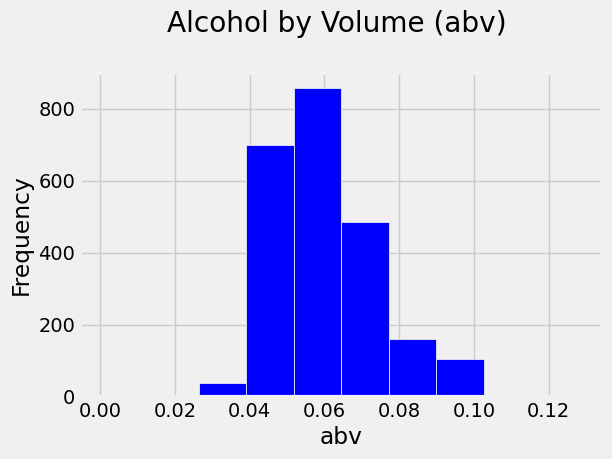

In [8]:
plt.figure(figsize=(6,4))
plt.hist(abv, bins=10, color='b', histtype='bar', edgecolor='w') 
plt.title('Alcohol by Volume (abv) \n')
plt.xlabel('abv')
plt.ylabel('Frequency');

You can tell that the most frequent values of `abv` fall in the bin just
above 0.05 (5% alcohol), and the bin below. The mean value of your data
is 0.06, which happens to be within the top-frequency bin, but data is
not always so neat (sometimes, extreme values weigh heavily on the
mean). Note also that you have a _right skewed_ distribution, with
higher-frequency bins occuring in the lower end of the range than in the
higher end.

If you played around with the bin sizes in the previous lesson, you might have noticed that with a lot of bins, it becomes harder to visually pick out the patterns in the data. But if you use too few bins, the plot is also unhelpful. What number of bins is just right? Well, it depends on your data, so you'll just have to experiment and use your best judgement.

Let's learn a new trick. It turns out that `pandas` has built-in methods to make histograms directly from columns of a dataframe! (It uses Matplotlib internally for that.) The syntax is short and sweet:

```
dataframe.hist(column='label')
```

And `pandas` plots a pretty nice histogram without help. You can add optional parameters to set these to your liking; see the [documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html). Check it out, and compare with your previous plot.

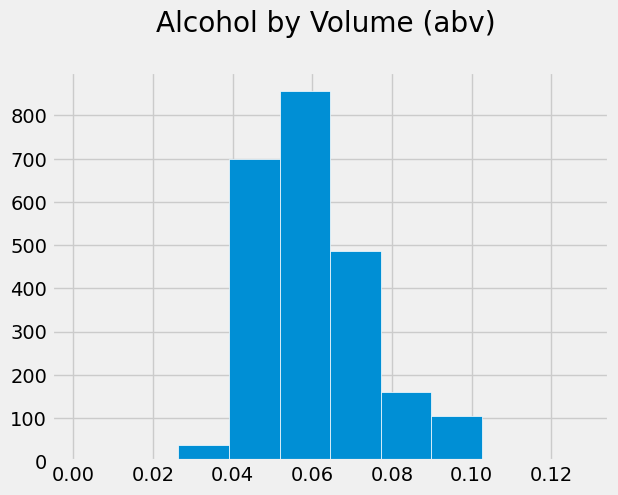

In [9]:
beers.hist(column='abv', edgecolor='white')
plt.title('Alcohol by Volume (abv) \n');

Which one do you like better? Well, the `pandas` histogram took fewer lines of code to create.  And it doesn't look bad at all. But you do have more fine-grained control with Matplotlib. Which method you choose in a real situation will just depend on the situation and your preference.

### Exploring quantitative data (continued)

In the [previous lesson](./01_Cheers_Stats_Beers), you learned how to compute the mean of the data using `np.mean()`. How easy is that? But then you wrote your own custom functions to compute variance or standard deviation. There are some standard numpy libraries that you can use instead. 


##### Exercise:

* Go to the documentation of [`np.var()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.var.html) and analyze if this function is computing the _sample variance_. 
__Hint__: Check what it says about the "data degrees of freedom."

If you did the reading, you might have noticed that, by default, the argument `ddof` in `np.var()` is set to zero. If you use the default option, then you are not really calculating the sample variance. Recall from the previous lesson that the **sample variance** is:

$$
\begin{equation*}     
     \text{var}_{sample} = \frac{1}{N-1}\sum_{i} (x_i - \bar{x})^2
\end{equation*}
$$

Therefore, you need to be explicit about the division by $N-1$ when calling `np.var()`. How do you do that? you explicitly set `ddof` to `1`.  

For example, to compute the sample variance for your `abv` variable, you do:

In [10]:
var_abv = np.var(abv, ddof = 1)

Now, you can compute the standard deviation by taking the square root of `var_abv`:

In [11]:
std_abv = np.sqrt(var_abv)
print(std_abv)

0.013541733716680264


You might be wondering if there is a built-in function for the standard deviation in NumPy. Go on and search online and try to find something.

**Spoiler alert!**
You will. 

## Exercise:

1. Read the documentation about the NumPy standard deviation function, compute the standard deviation for `abv` using this function, and check that you obtained the same value than if you take the square root of the variance computed with NumPy.

2. Compute the variance and standard deviation for the variable `ibu`.

In [12]:
?np.std

In [13]:
np.std(abv,ddof=1)

np.float64(0.013541733716680264)

### Median value

So far, you've learned to characterize quantitative data using the mean, variance and standard deviation.

If you watched Prof. Sainani's lecture [Describing Quantitative Data: Where is the center?](https://youtu.be/tQ5slNYRcC4) (recommended in your previous lesson), you'll recall that she also introduced the **median**: the middle value in the data, the value that separates your data set in half. (If there's an even number of data values, you take the average between the two middle values.)

As you may anticipate, NumPy has a built-in function that computes the median, helpfully named [`numpy.median()`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.median.html). 

##### Exercise:

Using NumPy, compute the median for your variables `abv` and `ibu`. Compare the median with the mean, and look at the histogram to locate where the values fall on the x-axis.

### Box plots

Another handy way to visualize the distribution of quantitative data is using **box plots**. By "distribution" of the data, you mean some idea of the dataset's "shape": where is the center, what is the range, what is the variation in the data. 
Histograms are the most popular type of plots in exploratory data analysis. But check out box plots: they are easy to make with `pyplot`:

/tmp/ipykernel_2038/315735715.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(abv, labels=['Alcohol by volume']);


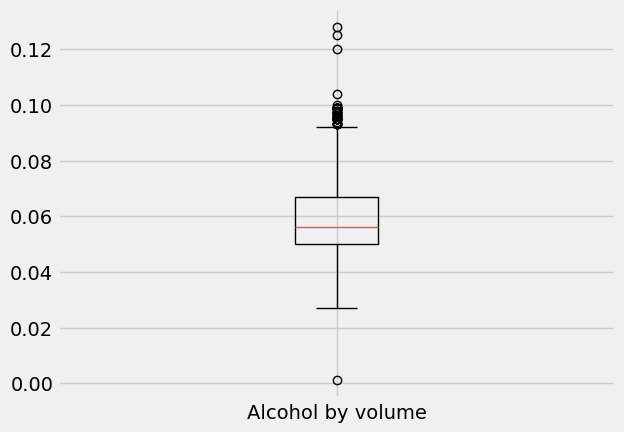

In [14]:
plt.boxplot(abv, labels=['Alcohol by volume']);

/tmp/ipykernel_2038/1528684497.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(ibu, labels=['International bitterness unit']);


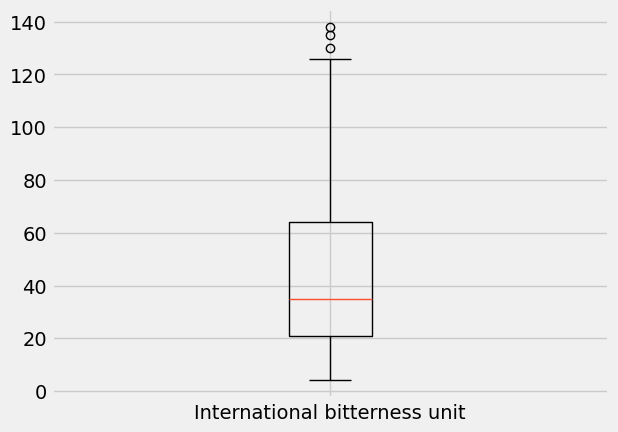

In [15]:
plt.boxplot(ibu, labels=['International bitterness unit']);

What is going on here? Obviously, there is a _box_: it represents 50% of the data in the middle of the data range, with the line across it (here, in orange) indicating the _median_. 

The bottom of the box is at the 25th _percentile_, while the top of the box is at the 75th percentile. In other words, the bottom 25% of the data falls below the box, and the top 25% of the data falls above the box.

_Confused by percentiles?_
The Nth percentile is the value below which N% of the observations fall. 

Recall the bell curve from your previous lesson: you said that 95% of the data falls at a distance $\pm 2 \sigma$ from the mean. This implies that 5% of the data (the rest) falls in the (symmetrical) tails, which in turn implies that the 2.5 percentile is at $-2\sigma$ from the mean, and the 97.5 percentile is at $+2\sigma$ from the mean.

The percentiles 25, 50, and 75 are also named _quartiles_, since they divide the data into quarters. They are named first (Q1), second (Q2 or median) and third quartile (Q3), respectively. 

Fortunately, NumPy has a function to compute percentiles and you can do it in just one line. Let's use [`np.percentile()`](https://docs.scipy.org/doc/numpy-dev/reference/generated/np.percentile.html) to compute the `abv` and `ibu`  quartiles. 

** abv quartiles **

In [16]:
Q1_abv = np.percentile(abv, q=25)
Q2_abv = np.percentile(abv, q=50)
Q3_abv = np.percentile(abv, q=75)

print('The first quartile for abv is {}'.format(Q1_abv))
print('The second quartile for abv is {}'.format(Q2_abv))
print('The third quartile for abv is {}'.format(Q3_abv))

The first quartile for abv is 0.05
The second quartile for abv is 0.0559999999999999
The third quartile for abv is 0.067


**ibu quartiles**

You can also pass a list of percentiles to `np.percentile()` and calculate several of them in one go. For example, to compute the quartiles of `ibu`, you do:

In [17]:
quartiles_ibu = np.percentile(ibu, q=[25, 50, 75])

print('The first quartile for ibu is {}'.format(quartiles_ibu[0]))
print('The second quartile for ibu is {}'.format(quartiles_ibu[1]))
print('The third quartile for ibu is {}'.format(quartiles_ibu[2]))

The first quartile for ibu is 21.0
The second quartile for ibu is 35.0
The third quartile for ibu is 64.0


OK, back to box plots. The height of the box—between the 25th and 75th percentile—is called the _interquartile range_ (IQR). Outside the box, you have two vertical lines—the so-called "whiskers" of the box plot—which used to be called "box and whiskers plot" [3]. 

The whiskers extend to the upper and lower extremes (short horizontal lines). The extremes follow the following rules: 

* Top whisker: lower value between the **maximum** and `Q3 + 1.5 x IQR`. 
* Bottom whisker: higher value between the **minimum** and `Q1 - 1.5 x IQR`

Any data values beyond the upper and lower extremes are shown with a marker (here, small circles) and are an indication of outliers in the data.

##### Exercise:

Calculate the end-points of the top and bottom whiskers for both the `abv` and `ibu` variables, and compare the results with the whisker end-points you see in the plot.

In [18]:
IQR = quartiles_ibu[2]-quartiles_ibu[0]
TW = np.min([np.max(ibu),quartiles_ibu[2]+1.5*IQR])
BW = np.max([np.min(ibu),quartiles_ibu[0]-1.5*IQR])

print('ibu:\n----------------')
print('top whisker = {:.1f} ibu'.format(TW))
print('bottom whisker = {:.1f} ibu'.format(BW))

quartiles_abv = np.percentile(abv, q=[25, 50, 75])

IQR = quartiles_abv[2]-quartiles_abv[0]
TW = np.min([np.max(abv),quartiles_abv[2]+1.5*IQR])
BW = np.max([np.min(abv),quartiles_abv[0]-1.5*IQR])

print('\nabv:\n----------------')
print('top whisker = {:.1f}% abv'.format(TW*100))
print('bottom whisker = {:.1f}% abv'.format(BW*100))

ibu:
----------------
top whisker = 128.5 ibu
bottom whisker = 4.0 ibu

abv:
----------------
top whisker = 9.2% abv
bottom whisker = 2.5% abv


##### A bit of history:

"Box-and-whiskers" plots were invented by John Tukey over 45 years ago. Tukey was a famous mathematician/statistician who is credited with coining the words _software_ and _bit_ [4]. He was active in the efforts to break the _Enigma_ code during WWII, and worked at Bell Labs in the first surface-to-air guided missile ("Nike"). A classic 1947 work on early design of the electonic computer acknowledged Tukey: he designed the electronic circuit for computing addition. Tukey was also a long-time advisor for the US Census Bureau, and a consultant for the Educational Testing Service (ETS), among many other contributions [5].

##### Note:

Box plots are also drawn horizontally. Often, several box plots are drawn side-by-side with the purpose of comparing distributions.

## Visualizing categorical data

The typical method of visualizing categorical data is using **bar plots**. These show visually the frequency of appearance of items in each category, or the proportion of data in each category. Suppose you wanted to know how many beers of the same style are in your data set. Remember: the _style_ of the beer is an example of _categorical data_. Let's extract the column with the style information from the `beers` dataframe, assign it to a variable named `style_series`, check the type of this variable, and view the first 10 elements.

In [19]:
style_series = beers['style']

In [20]:
type(style_series)

pandas.core.series.Series

In [21]:
style_series.unique()

array(['American Pale Lager', 'American Pale Ale (APA)', 'American IPA',
       'American Double / Imperial IPA', 'Oatmeal Stout',
       'American Porter', 'Saison / Farmhouse Ale', 'Belgian IPA',
       'Cider', 'Baltic Porter', 'Tripel', 'American Barleywine',
       'Winter Warmer', 'American Stout', 'Fruit / Vegetable Beer',
       'English Strong Ale', 'American Black Ale', 'Belgian Dark Ale',
       'American Blonde Ale', 'American Amber / Red Ale',
       'Berliner Weissbier', 'American Brown Ale',
       'American Pale Wheat Ale', 'Belgian Strong Dark Ale', 'Kölsch',
       'English Pale Ale', 'American Amber / Red Lager',
       'English Barleywine', 'Milk / Sweet Stout', 'German Pilsener',
       'Pumpkin Ale', 'Belgian Pale Ale', 'American Pilsner',
       'American Wild Ale', 'English Brown Ale', 'Altbier',
       'California Common / Steam Beer', 'Gose', 'Cream Ale',
       'Vienna Lager', 'Witbier', 'American Double / Imperial Stout',
       'Munich Helles Lager', 'Schwa

Already in the first 10 elements you see that you have two beers of the style "American IPA," two beers of the style "American Pale Ale (APA)," but only one beer of the style "Oatmeal Stout." The question is: how many beers of each style are contained in the whole series?

Luckily, `pandas` has a built-in function to answer that question: [`series.value_counts()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html) (where `series` is the variable name of the `pandas` series you want the counts for). Let's try it on your `style_series`, and save the result in a new variable named `style_counts`.

In [22]:
style_counts = style_series.value_counts()
print(style_counts[-50:])

style
American Double / Imperial Stout      9
Schwarzbier                           9
Herbed / Spiced Beer                  9
Belgian Strong Pale Ale               7
American Dark Wheat Ale               7
Bière de Garde                        7
Doppelbock                            7
Bock                                  7
Belgian Strong Dark Ale               6
Baltic Porter                         6
English Dark Mild Ale                 6
Dortmunder / Export Lager             6
Foreign / Export Stout                6
American Wild Ale                     6
California Common / Steam Beer        6
Maibock / Helles Bock                 5
Euro Dark Lager                       5
Dubbel                                5
Irish Dry Stout                       5
Mead                                  5
English Strong Ale                    4
Munich Dunkel Lager                   4
Quadrupel (Quad)                      4
Dunkelweizen                          4
English Barleywine                

In [23]:
type(style_counts)

pandas.core.series.Series

In [24]:
len(style_counts)

99

The `len()` function tells us that `style_counts` has 99 elements. That is, there are a total of 99 styles of beer in your data set. Wow, that's a lot!

Notice that `value_counts()` returned the counts sorted in decreasing order: the most popular beer in your data set is "American IPA" with 424 entries in our data. The next-most popular beer is "American Pale Ale (APA)" with a lot fewer entries (245), and the counts decrease sharply after that. Naturally, you'd like to know how much more popular are the top-2 beers from the rest. Bar plot to the rescue!

Below, you'll draw a horizontal bar plot directly with `pandas` (which uses Matplotlib internally) using the [`plot.barh()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.barh.html) method for series. We'll only show the first 20 beers, because otherwise you'll get a huge plot. This plot gives us a clear visualization of the popularity ranking of beer styles in the US!

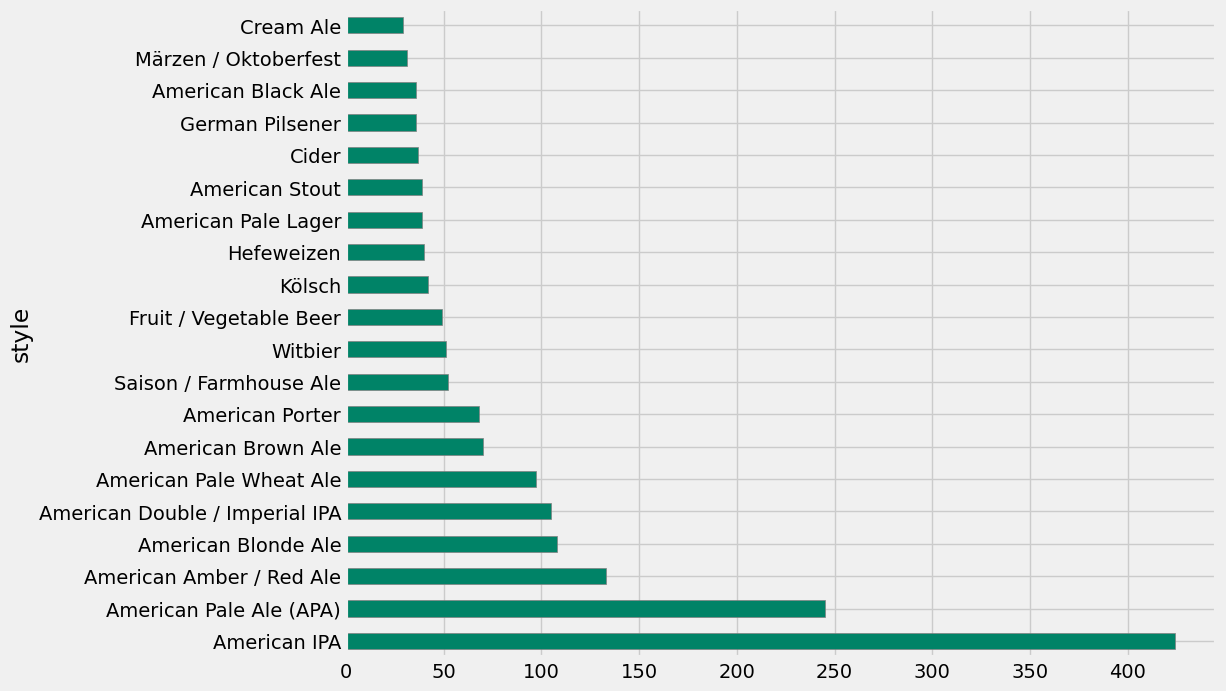

In [25]:
style_counts[0:20].plot.barh(figsize=(10,8), color='#008367', edgecolor='gray');

## Visualizing multiple data

These visualizations are really addictive! We're now getting ambitious: what if you wanted to show more than one feature, together on the same plot? What if you wanted to get insights about the relationship between two features through a multi-variable plot? 

For example, you can explore the relationship between bitterness of beers and the alcohol-by-volume fraction.

### Scatter plots

Maybe you can do this: imagine a plot that has the alcohol-by-volume on the absissa, and the IBU value on the ordinate. For each beer, you can place a dot on this plot with its `abv` and `ibu` values as $(x, y)$ coordinates. This is called a **scatter plot**.

We run into a bit of a problem, though. The way you handled the beer data above, you extracted the column for `abv` into a series, dropped the null entries, and saved the values into a NumPy array. You then repeated this process for the `ibu` column. Because a lot more `ibu` values are missing, you ended up with two arrays of different length: 2348 entries for the `abv` series, and 1405 entries for the `ibu` series. If you want to make a scatter plot with these two features, you'll need series (or arrays) of the same length.

Let's instead clean the whole `beers` dataframe (which will completely remove any row that has a null entry), and _then_ extract the values of the two series into NumPy arrays.

In [26]:
beers_clean = beers.dropna()

In [27]:
ibu = beers_clean['ibu'].values
len(ibu)

1405

In [28]:
abv = beers_clean['abv'].values
len(abv)

1405

Notice that both arrays now have 1403 entries—not 1405 (the length of the clean `ibu` data), because two rows that had a non-null `ibu` value _did_ have a null `abv` value and were dropped.

With the two arrays of the same length, you can now call the [`pyplot.scatter()`](https://matplotlib.org/devdocs/api/_as_gen/matplotlib.pyplot.scatter.html) function.

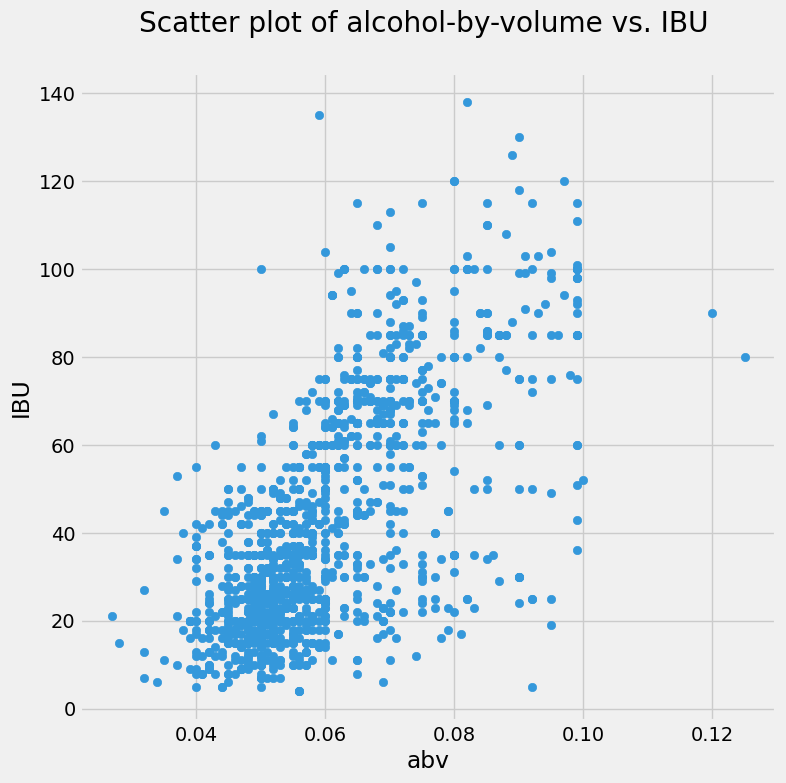

In [29]:
plt.figure(figsize=(8,8))
plt.scatter(abv, ibu, color='#3498db') 
plt.title('Scatter plot of alcohol-by-volume vs. IBU \n')
plt.xlabel('abv')
plt.ylabel('IBU');

Hmm. That's a bit of a mess. Too many dots! But you do make out that the beers with low alcohol-by-volume tend to have low bitterness. For higher alcohol fraction, the beers can be anywhere on the bitterness scale: there's a lot of vertical spread on those dots to the right of the plot. 

An idea! What if the bitterness has something to do with _style_?

### Bubble chart

What you imagined is that you could group together the beers by style, and then make a new scatter plot where each marker corresponds to a style. The beers within a style, though, have many values of alcohol fraction and bitterness: you have to come up with a "summary value" for each style. Well, why not the _mean_… you can calculate the average `abv` and the average `ibu` for all the beers in each style, use that pair as $(x,y)$ coordinate, and put a dot there representing the style. 

Better yet! We'll make the size of the "dot" proportional to the popularity of the style in your data set! This is called a **bubble chart**.

How to achieve this idea? you searched online for "mean of a column with pandas" and you landed in [`dataframe.mean()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html). This could be helpful… But you don't want the mean of a _whole_ column—we want the mean of the column values grouped by _style_. Searching online again, you landed in [`dataframe.groupby()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html). This is amazing: `pandas` can group a series for you! 

Here's what you want to do: group beers by style, then compute the mean of `abv` and `ibu` in the groups. You experimented with `beers_clean.groupby('style').mean()` and were amazed… However, one thing was bothersome: `pandas` computed the mean (by style) of every column, including the `id` and `brewery_id`, which have no business being averaged. So you decided to first drop the columns you don't need, leaving only `abv`, `ibu` and `style`. You can use the [`dataframe.drop()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html) method for that. Check it out!

In [30]:
beers_styles = beers_clean.drop(['Unnamed: 0','name','brewery_id','ounces','id'], axis=1)

We now have a dataframe with only the numeric features `abv` and `ibu`, and the categorical feature `style`. Let's find out how many beers you have of each style—you'd like to use this information to set the size of the style bubbles.

In [31]:
style_counts = beers_styles['style'].value_counts()

In [32]:
type(style_counts)

pandas.core.series.Series

In [33]:
len(style_counts)

90

The number of beers in each style appears on each row of `style_counts`, sorted in decreasing order of count. You have 90 different styles, and the most popular style is the "American IPA," with 301 beers…

##### Discuss with your neighbor:

* What happened? you used to have 99 styles and 424 counts in the "American IPA" style. Why is it different now?

OK. You want to characterize each style of beer with the _mean values_ of the numeric features, `abv` and `ibu`, within that style. Let's get those means.

In [34]:
style_means = beers_styles.groupby('style').mean()

In [35]:
style_means

,abv,ibu
style,,
Abbey Single Ale,0.049000,22.000000
Altbier,0.054625,34.125000
American Adjunct Lager,0.046545,11.000000
American Amber / Red Ale,0.057195,36.298701
American Amber / Red Lager,0.048062,23.250000
...,...,...
Tripel,0.089750,23.500000
Vienna Lager,0.050429,24.357143
Wheat Ale,0.060000,24.000000


Looking good! you have the information you need: the average `abv` and `ibu` by style, and the counts by style. The only problem is that `style_counts` is sorted by decreasing count value, while `style_means` is sorted alphabetically by style. Ugh.

Notice that `style_means` is a dataframe that is now using the style string as a _label_ for each row. Meanwhile, `style_counts` is a `pandas` series, and it also uses the style as label or index to each element.

More online searching and you find the [`series.sort_index()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sort_index.html) method. It will sort your style counts in alphabetical order of style, which is what you want.

In [36]:
style_counts = style_counts.sort_index()

In [37]:
style_counts[0:10]

style
Abbey Single Ale               2
Altbier                        8
American Adjunct Lager        11
American Amber / Red Ale      77
American Amber / Red Lager    16
American Barleywine            2
American Black Ale            20
American Blonde Ale           61
American Brown Ale            38
American Dark Wheat Ale        5
Name: count, dtype: int64

Above, you used Matplotlib to create a scatter plot using two NumPy arrays as the `x` and `y` parameters. Like you saw previously with histograms, `pandas` also has available some plotting methods (calling Matplotlib internally). Scatter plots made easy!

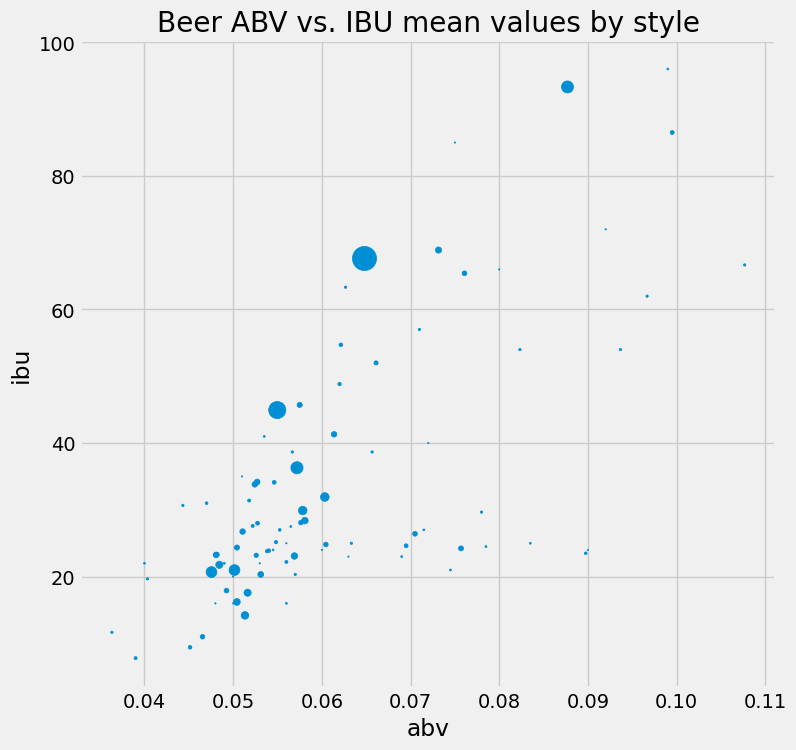

In [38]:
style_means.plot.scatter(figsize=(8,8), 
                         x='abv', y='ibu', s=style_counts, 
                         title='Beer ABV vs. IBU mean values by style');

That's rad! Perhaps the bubbles are too small. You could multiply the `style_counts` by a factor of 5, or maybe 10? You should experiment.

But you are feeling gung-ho about this now, and decided to find a way to make the _color_ of the bubbles also vary with the style counts. Below, you import the [`colormap`](https://matplotlib.org/api/cm_api.html) module of Matplotlib, and you set your colors using the [_viridis_ colormap](https://matplotlib.org/examples/color/colormaps_reference.html) on the values of `style_counts`, then you repeat the plot with these colors on the bubbles and some transparency. _What do you think?_

In [39]:
from matplotlib import cm
colors = cm.viridis(style_counts.values)

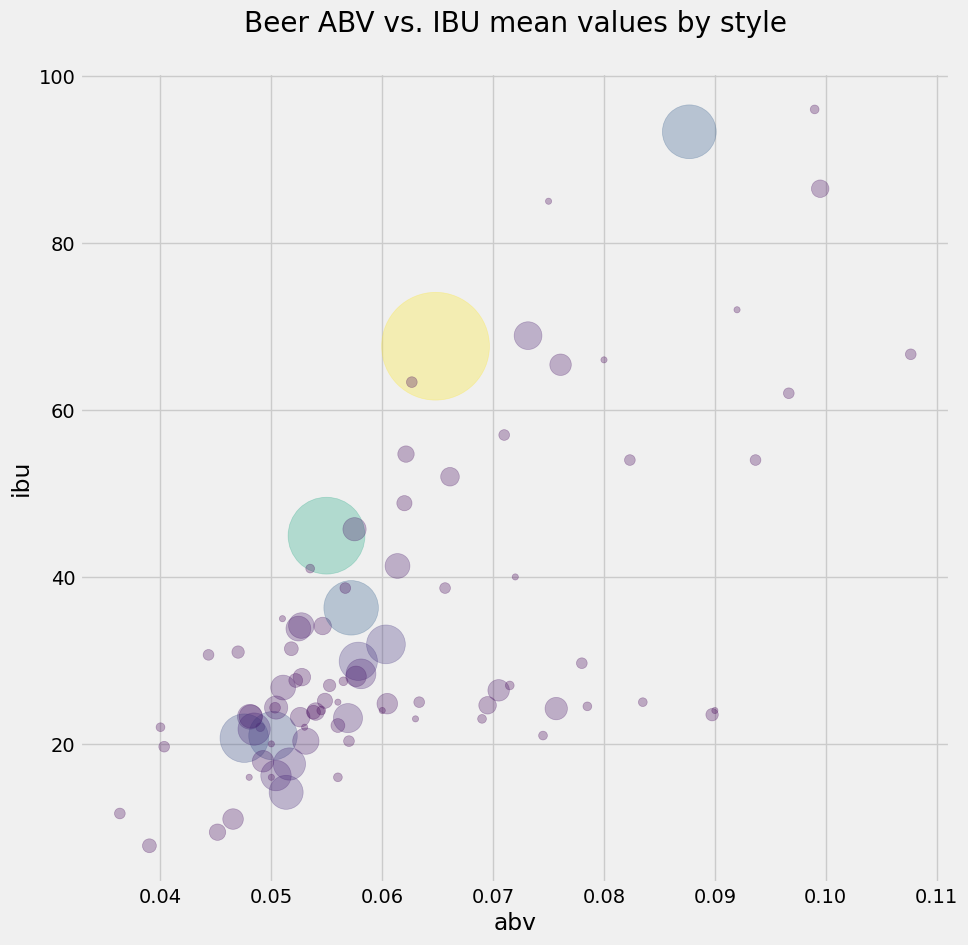

In [40]:
style_means.plot.scatter(figsize=(10,10), 
                         x='abv', y='ibu', s=style_counts*20, color=colors,
                         title='Beer ABV vs. IBU mean values by style\n',
                         alpha=0.3); #alpha sets the transparency

It looks like the most popular beers do follow a linear relationship between alcohol fraction and IBU. You learned a lot about beer without having a sip!

_Wait... one more thing!_ What if you add a text label next to the bigger bubbles, to identify the style? 

OK, here you go a bit overboard, but you couldn't help it. You played around a lot to get this version of the plot. It uses `enumerate` to get pairs of indices and values from a list of style names; an `if` statement to select only the large-count styles; and the [`iloc[]`](http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.DataFrame.iloc.html) slicing method of `pandas` to get a slice based on index position, and extract `abv` and `ibu` values to an $(x,y)$ coordinate for placing the annotation text. _Are you overkeen or what!_

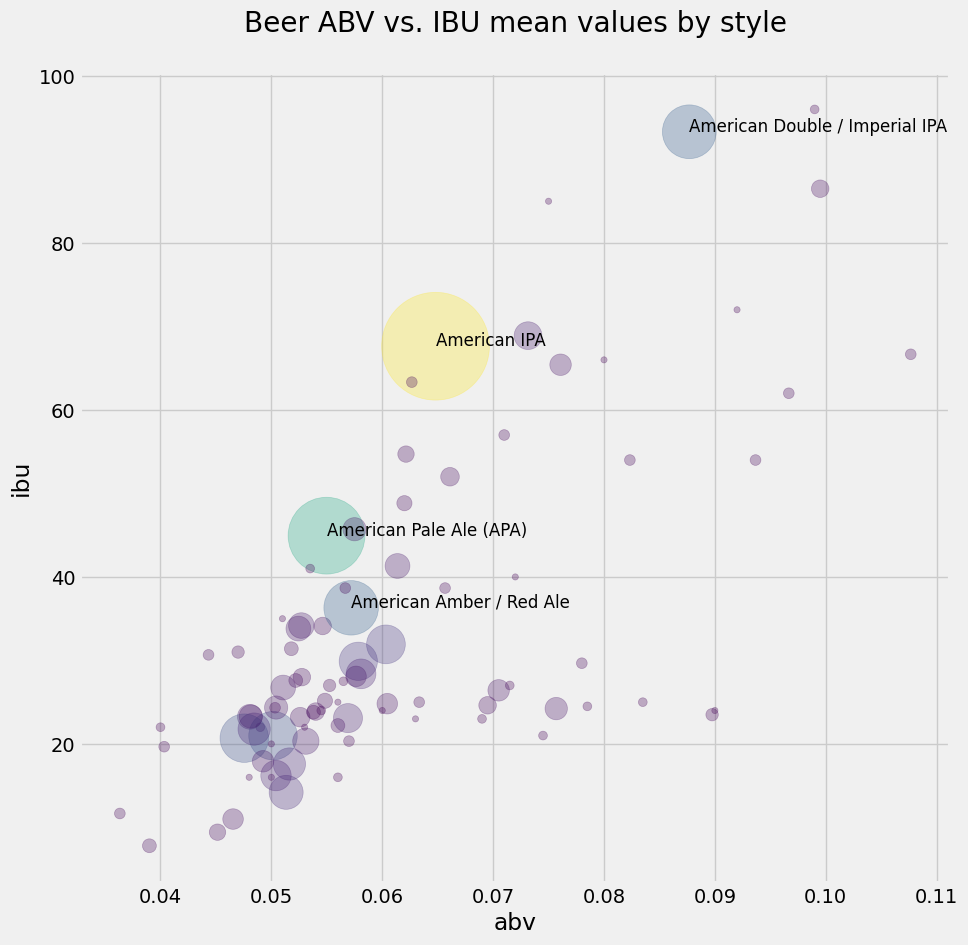

In [41]:
ax = style_means.plot.scatter(figsize=(10,10), 
                               x='abv', y='ibu', s=style_counts*20, color=colors,
                               title='Beer ABV vs. IBU mean values by style\n',
                               alpha=0.3);

for i, txt in enumerate(list(style_counts.index.values)):
    if style_counts.values[i] > 65:
        ax.annotate(txt, (style_means.abv.iloc[i],style_means.ibu.iloc[i]), fontsize=12)

## What you've learned

* You should always plot your data.
* The concepts of quantitative and categorical data.
* Plotting histograms directly on columns of dataframes, using `pandas`.
* Computing variance and standard deviation using NumPy built-in functions.
* The concept of median, and how to compute it with NumPy.
* Making box plots using `pyplot`.
* Five statistics of a box plot: the quartiles Q1, Q2 (median) and Q3 (and  interquartile range Q3$-$Q1), upper and lower extremes.
* Visualizing categorical data with bar plots.
* Visualizing multiple data with scatter plots and bubble charts.
* `pandas` is awesome!

## References

1. [Craft beer datatset](https://github.com/nickhould/craft-beers-dataset) by Jean-Nicholas Hould.
2. [What's The Meaning Of IBU?](https://beerconnoisseur.com/articles/whats-meaning-ibu) by Jim Dykstra for The Beer Connoisseur (2015).
3. 40 years of boxplots (2011). Hadley Wickham and Lisa Stryjewski, _Am. Statistician_. [PDF available](http://vita.had.co.nz/papers/boxplots.pdf)
4. [John Wilder Tukey](https://www.britannica.com/biography/John-Wilder-Tukey), Encyclopædia Britannica.
5. John W. Tukey: His life and professional contributions (2002). David R. Brillinger, _Ann. Statistics_. [PDF available](https://www.stat.berkeley.edu/~brill/Papers/life.pdf)